In [92]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import matplotlib as mpl
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.cbook as cbook

# Clusters

Text(0, 0.5, 'Row')

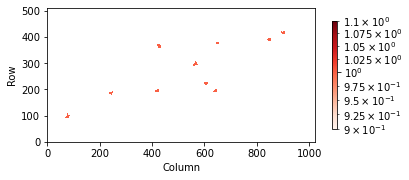

In [321]:
def makeCluster(wx, wy, npix, wnpix, nclusters = 1):
    cluster=[]
    for nc in range(nclusters):
        x = np.random.normal(0, wx, npix*5)
        y = np.random.normal(0, wy, npix*5)
        cx = np.random.randint(int(wx*5), 1023-(wx*5))
        cy = np.random.randint(int(wy*5),  511-(wy*5))
        angle = np.random.uniform(0, np.pi, npix*5)
        xr = x*np.cos(angle)+y*np.sin(angle)+cx
        yr = y*np.cos(angle)-x*np.sin(angle)+cy
        x = xr.astype(int)
        y = yr.astype(int)
        
        k = 0
        npixn=np.random.normal(npix, wnpix)
        npixn=np.around(npixn)
        for i in range(len(x)):
            if ([x[i],y[i]]) not in cluster and k<npixn:
                k+=1
                cluster.append([x[i],y[i]])
        
        
    return cluster
        
    
cluster= makeCluster(3,3,10,3,10)

#generate the hitmap
cluster_matrix=np.zeros((512,1024))
for pixel in cluster:
    x=pixel[0]
    y=pixel[1]
    cluster_matrix[y,x] += 1

#and plot it
fig, ax = plt.subplots()
colormap = cm.get_cmap('Reds')
psm = ax.pcolormesh(cluster_matrix, cmap=colormap, norm=colors.LogNorm(), vmin=1, vmax=np.max(cluster_matrix))
cbar=plt.colorbar(psm, shrink=0.5, ax=ax)
#cbar.set_label("N. hits")
plt.axis('scaled')
ax.set(xlim=(0, 1023), ylim=(0, 511))
plt.xlabel("Column")
plt.ylabel("Row")




# DBscan

In [249]:
def findClusterDB(X, distance):
    db = DBSCAN(eps=distance, min_samples=2).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    nc = 0
    #initialize an empty list to accomodate the sample coordinates whitin the cluster
    clusters = [[] for _ in range(n_clusters_)]
    #total_clusters += n_clusters_
    #total_noise_points += n_noise_
    for j in range(len(db.labels_)):
        if db.labels_[j] == -1:	#noise sample has label -1
            nc = nc + 1	#noise counter
        else: 
            index = db.labels_[j]
            #print(db.components_[j-nc])
            clusters[index].append(np.array(db.components_[j - nc])) 
    Areas=[]
    for j in range(len(clusters)):
        Areas.append(len(clusters[j]))
    return clusters, Areas, nc
        

# Packet decoder simulation

In [319]:
N=10000
Areas=[]
for i in range(N):
    Npackets=np.random.randint(5,10)
    cluster=makeCluster(3,6,15,4,Npackets)
    ClusterDC, AreaCluster=findClusterDB(cluster,10)
    Areas=np.append(Areas,AreaCluster)

print(np.mean(Areas))

14.934959114681153


In [299]:
i = 0
total_clusters = 0
total_noise_points = 0
while True:
    file_name="file{0:0d}.npy".format(i)
    my_file = Path(file_name)
    if my_file.is_file():
        i += 1
        packet = np.load(file_name, allow_pickle=True)
        print(len(packet[0]))
        clusters = findClusterDB(packet)
        clusters = findClusterAC(packet)
    else:
        print ("No more packets")
        break

No more packets
